In [1]:
fn_ini = 'sfincs_semarang.ini'
with open(fn_ini, 'r') as f:
    txt = f.read()
print(txt)

[setup_config]
tref = 20210130 000000
tstart = 20210130 000000
tstop = 20210215 000000
alpha = 0.5
zsini = 0.5

[setup_topobathy]
topobathy_fn = merit_hydro       # topobathy basemaps ['elevtn']
crs = utm                       # model CRS (must be UTM zone)

[setup_merge_topobathy]
topobathy_fn = gebco            # bathymetry ['elevtn']
mask_fn = osm_coastlines        # sea polygon describing where we want to use the new data
offset_fn = dtu10mdt_egm96      # mean dynamic topography to account for the difference in vertical datum between the current and new data
merge_method = first            # use valid new data where the current data has invalid (nodata) values
merge_buffer = 2                # buffer (cells) between elevation and bathymetry data filled with 'linear' interpolation

[setup_mask]
elv_min = -5                    # minimum elevation for valid cells

[setup_cn_infiltration]
cn_fn = gcn250                  # curve number source
antecedent_runoff_conditions = avg # for gcn

In [1]:
!hydromt build sfincs ./semarang_sfincs_150 "{'bbox': [110.267286,-7.114464,110.513604,-6.917627]}" -r 150 -i sfincs_semarang.ini -vv --dd

2022-06-02 13:00:04,082 - build - log - DEBUG - Writing log messages to new file C:\Users\ampolini\Workingfolder\hydromt_sfincs-main\examples\semarang_sfincs_150\hydromt.log.
2022-06-02 13:00:04,083 - build - log - INFO - HydroMT version: 0.4.5
2022-06-02 13:00:04,083 - build - main - INFO - Building instance of sfincs model at C:\Users\ampolini\Workingfolder\hydromt_sfincs-main\examples\semarang_sfincs_150.
2022-06-02 13:00:04,083 - build - main - INFO - User settings:
2022-06-02 13:00:04,112 - build - model_plugins - DEBUG - Loaded model plugin 'sfincs = hydromt_sfincs.sfincs.SfincsModel' (0.2.1)
2022-06-02 13:00:04,112 - build - model_api - INFO - Initializing sfincs model from hydromt_sfincs (v0.2.1).
2022-06-02 13:00:04,113 - build - data_adapter - INFO - Adding deltares_data v0.0.6 sources from https://github.com/DirkEilander/hydromt-artifacts/releases/download/v0.0.6/deltares_data.yml
2022-06-02 13:00:05,167 - build - model_api - WARNING - Model dir already exists and files migh

In [10]:
fn_inp = "./semarang_sfincs_150/sfincs.inp"
with open(fn_inp, "r") as f:
    txt = f.read()

print(txt)

mmax            = 181
nmax            = 145
dx              = 150.0
dy              = 150.0
x0              = 419100.0
y0              = 9213600.0
rotation        = 0
epsg            = 23879
inputformat     = bin
outputformat    = net
tref            = 20170201 000000
tstart          = 20170201 000000
tstop           = 20170202 000000
dtout           = 3600
dthisout        = 600
dtmaxout        = 86400
advection       = 0
alpha           = 0.5
huthresh        = 0.05
theta           = 0.9
min_lev_hmax    = -1
zsini           = 0.5
depfile         = sfincs.dep
mskfile         = sfincs.msk
indexfile       = sfincs.ind
scsfile         = sfincs.scs
manningfile     = sfincs.man




In [11]:
%matplotlib inline
from hydromt_sfincs import SfincsModel

(<Figure size 936x504 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'SFINCS dep map'}, xlabel='x coordinate UTM zone 49S [m]', ylabel='y coordinate UTM zone 49S [m]'>)

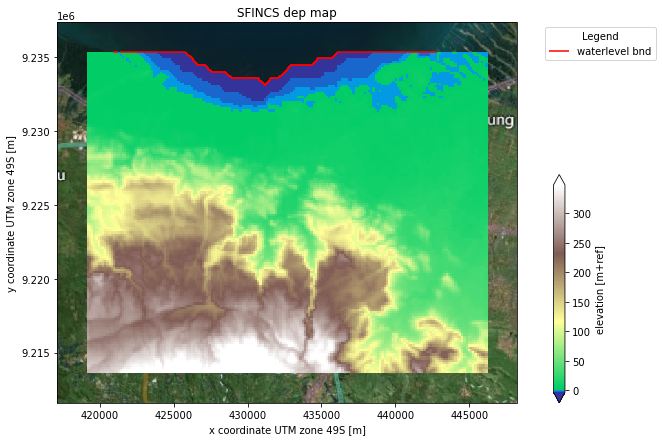

In [12]:
# define the model's configuration file
root = r"./semarang_sfincs_150"

# read the model with hydromt methods
mod = SfincsModel(root=root, mode="r")
mod.read()
mod.plot_basemap(figsize=(13, 7), shaded=False)